In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re
from pandas_profiling import ProfileReport
import scipy.stats as stats

#Remove warnings
import warnings
warnings.filterwarnings('ignore')


# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

In [2]:
%cd "D:\KAVYA\EXL Bootcamp\Python\case study\Python Case Study\Data"

D:\KAVYA\EXL Bootcamp\Python\case study\Python Case Study\Data


In [3]:
Inventory_data = pd.read_csv('Inventory_Stock_Data.csv')
Inventory_data

,order-now,product id,product name,avg lead time,avg order qty,current stock,max lead time,max order qty,mod,reorder point,safety stock
0,green,19,Nike Men's Fingertrap Max Training Shoe,10,1,69,30,1,1,35,25
1,orange,24,Elevation Training Mask 2.0,10,3,175,30,5,0,175,144
2,green,35,adidas Brazuca 2014 Official Match Ball,10,1,65,30,1,1,35,25
3,green,37,adidas Kids' F5 Messi FG Soccer Cleat,10,3,328,30,5,1,175,146
4,orange,44,adidas Men's F10 Messi TRX FG Soccer Cleat,10,3,175,30,5,0,175,145
...,...,...,...,...,...,...,...,...,...,...,...
113,green,1359,Adult dog supplies,10,1,69,30,1,1,35,25
114,orange,1360,Smart watch,10,1,35,30,1,0,35,25
115,green,1361,Toys,10,1,61,30,1,1,35,25
116,orange,1362,Fighting video games,10,1,35,30,1,0,35,25


In [4]:
Sales_data = pd.read_csv('Sales_Shipment_Data.csv')
Sales_data

,Product Category Id,Category Name,Class,Customer City,Customer Country,Customer Fname,Customer Id,Customer Lname,Customer Segment,Customer State,...,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Order Item Total,Order Profit Per Order,Product Price,Sales,Sales per customer
0,24,Women's Apparel,Moderate Value-Moderate Number,Roswell,EE. UU.,Jean,5673,Dunn,Corporate,NM,...,0.15,134920,50.000000,0.11,2,85.000000,9.610000,50.000000,100.000000,85.000000
1,24,Women's Apparel,Moderate Value-Moderate Number,Los Angeles,EE. UU.,Rose,9723,White,Corporate,CA,...,0.16,9722,50.000000,0.11,2,84.000000,9.490000,50.000000,100.000000,84.000000
2,24,Women's Apparel,Moderate Value-Moderate Number,Harvey,EE. UU.,Joshua,9511,Brady,Corporate,IL,...,0.06,129954,50.000000,0.33,2,94.500000,30.709999,50.000000,100.000000,94.500000
3,24,Women's Apparel,Moderate Value-Moderate Number,Elmhurst,EE. UU.,Mary,3326,Smith,Corporate,IL,...,0.05,2929,50.000000,0.29,2,95.000000,27.549999,50.000000,100.000000,95.000000
4,24,Women's Apparel,Moderate Value-Moderate Number,North Las Vegas,EE. UU.,Samantha,907,Kline,Corporate,NV,...,0.05,140056,50.000000,0.50,2,95.000000,47.500000,50.000000,100.000000,95.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,17,Cleats,High Value-Small Number,Escondido,EE. UU.,Charles,9615,Smith,Corporate,CA,...,0.16,124746,59.990002,-1.20,5,251.960007,-302.350006,59.990002,299.950012,251.960007
180515,17,Cleats,High Value-Small Number,Seattle,EE. UU.,Richard,1971,Stokes,Corporate,WA,...,0.17,73577,59.990002,0.47,5,248.960007,117.010002,59.990002,299.950012,248.960007
180516,9,Cardio Equipment,High Value-Small Number,Anaheim,EE. UU.,Mary,7663,Smith,Corporate,CA,...,0.25,60910,99.989998,-0.13,5,374.959992,-46.869999,99.989998,499.950012,374.959992
180517,17,Cleats,High Value-Small Number,San Diego,EE. UU.,Mary,415,Allen,Corporate,CA,...,0.13,114288,59.990002,0.48,5,260.959992,125.260002,59.990002,299.950012,260.959992


# a. Data Audit: Calculate Below metrics

# 1. Number of rows & Number of columns

In [5]:
Inventory_row_count = Inventory_data.shape[0]

Inventory_column_count = Inventory_data.shape[1]

In [6]:
print('Number of rows:', Inventory_row_count)
print('Number of columns:',Inventory_column_count)

Number of rows: 118
Number of columns: 11


In [7]:
Sales_row_count = Sales_data.shape[0]

Sales_column_count = Sales_data.shape[1]

In [8]:
print('Number of rows:', Sales_row_count)
print('Number of columns:',Sales_column_count)

Number of rows: 180519
Number of columns: 46


# 2. Number of numerical & categorical columns

In [9]:
Inventory_numeric_col = Inventory_data.select_dtypes(include=['int','float'])
Inventory_numeric_col.shape[1]

9

In [10]:
Inventory_categoric_col = Inventory_data.select_dtypes(exclude =['int','float'])
Inventory_categoric_col.shape[1]

2

In [11]:
Sales_numeric_col = Sales_data.select_dtypes(include=['int','float'])
Sales_numeric_col.shape[1]

24

In [12]:
Sales_categoric_col = Sales_data.select_dtypes(exclude=['int','float'])
Sales_categoric_col.shape[1]

22

# 3. Any other observations from the data in terms of cleaning, preparation required?

In [13]:
Inventory_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order-now      118 non-null    object
 1   product id     118 non-null    int64 
 2   product name   118 non-null    object
 3   avg lead time  118 non-null    int64 
 4   avg order qty  118 non-null    int64 
 5   current stock  118 non-null    int64 
 6   max lead time  118 non-null    int64 
 7   max order qty  118 non-null    int64 
 8   mod            118 non-null    int64 
 9   reorder point  118 non-null    int64 
 10  safety stock   118 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 10.3+ KB


In [14]:
Inventory_data.isna().sum()

order-now        0
product id       0
product name     0
avg lead time    0
avg order qty    0
current stock    0
max lead time    0
max order qty    0
mod              0
reorder point    0
safety stock     0
dtype: int64

In [15]:
Inventory_data.duplicated().sum()

0

In [16]:
Sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Product Category Id            180519 non-null  int64  
 1   Category Name                  180519 non-null  object 
 2   Class                          180519 non-null  object 
 3   Customer City                  180519 non-null  object 
 4   Customer Country               180519 non-null  object 
 5   Customer Fname                 180519 non-null  object 
 6   Customer Id                    180519 non-null  int64  
 7   Customer Lname                 180511 non-null  object 
 8   Customer Segment               180519 non-null  object 
 9   Customer State                 180519 non-null  object 
 10  Customer Street                180519 non-null  object 
 11  Customer Zipcode               180516 non-null  float64
 12  Delivery Status               

In [17]:
Sales_data.isna().sum()

Product Category Id              0
Category Name                    0
Class                            0
Customer City                    0
Customer Country                 0
Customer Fname                   0
Customer Id                      0
Customer Lname                   8
Customer Segment                 0
Customer State                   0
Customer Street                  0
Customer Zipcode                 3
Delivery Status                  0
Department Id                    0
Department Name                  0
Market                           0
Order City                       0
Order Country                    0
order date (DateOrders)          0
Order Id                         0
Order Region                     0
Order State                      0
Order Status                     0
Product Id                       0
Product Name                     0
shipping date (DateOrders)       0
Shipping Mode                    0
Type                             0
Benefit per order   

In [18]:
Sales_data.duplicated().sum()

0

# 4.  Detailed EDA - Univariate & Bi Variate analysis for each variable (distributions)

In [19]:
Inventory_data.describe(percentiles=np.arange(0,1,0.1),include='all')

,order-now,product id,product name,avg lead time,avg order qty,current stock,max lead time,max order qty,mod,reorder point,safety stock
count,118,118.000000,118,118.0,118.000000,118.000000,118.0,118.000000,118.000000,118.000000,118.000000
unique,2,NaN,118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,green,NaN,Nike Men's Fingertrap Max Training Shoe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,64,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,689.576271,NaN,10.0,2.084746,160.720339,30.0,3.169492,0.542373,110.932203,90.330508
std,NaN,403.120380,NaN,0.0,1.000652,115.003819,0.0,2.001303,0.500326,70.045617,60.270055
min,NaN,19.000000,NaN,10.0,1.000000,35.000000,30.0,1.000000,0.000000,35.000000,25.000000
0%,NaN,19.000000,NaN,10.0,1.000000,35.000000,30.0,1.000000,0.000000,35.000000,25.000000
10%,NaN,131.900000,NaN,10.0,1.000000,35.000000,30.0,1.000000,0.000000,35.000000,25.000000
20%,NaN,264.000000,NaN,10.0,1.000000,61.000000,30.0,1.000000,0.000000,35.000000,25.000000


In [20]:
Sales_data.describe(percentiles=np.arange(0,1,0.1),include='all')

,Product Category Id,Category Name,Class,Customer City,Customer Country,Customer Fname,Customer Id,Customer Lname,Customer Segment,Customer State,...,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Order Item Total,Order Profit Per Order,Product Price,Sales,Sales per customer
count,180519.000000,180519,180519,180519,180519,180519,180519.000000,180511,180519,180519,...,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000
unique,NaN,50,3,563,2,782,NaN,1109,3,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Cleats,High Value-Small Number,Caguas,EE. UU.,Mary,NaN,Smith,Consumer,PR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24551,67738,66770,111146,65150,NaN,64104,93504,69373,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,31.851451,NaN,NaN,NaN,NaN,NaN,6691.379495,NaN,NaN,NaN,...,0.101668,90260.000000,141.232550,0.120647,2.127638,183.107609,21.974989,141.232550,203.772096,183.107609
std,15.640064,NaN,NaN,NaN,NaN,NaN,4162.918106,NaN,NaN,NaN,...,0.070415,52111.490959,139.732492,0.466796,1.453451,120.043670,104.433526,139.732492,132.273077,120.043670
min,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,0.000000,1.000000,9.990000,-2.750000,1.000000,7.490000,-4274.979980,9.990000,9.990000,7.490000
0%,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,0.000000,1.000000,9.990000,-2.750000,1.000000,7.490000,-4274.979980,9.990000,9.990000,7.490000
10%,17.000000,NaN,NaN,NaN,NaN,NaN,1316.800000,NaN,NaN,NaN,...,0.010000,18052.800000,39.990002,-0.300000,1.000000,50.389999,-49.522000,39.990002,59.990002,50.389999
20%,17.000000,NaN,NaN,NaN,NaN,NaN,2595.000000,NaN,NaN,NaN,...,0.030000,36104.600000,49.980000,0.010000,1.000000,94.500000,1.520000,49.980000,100.000000,94.500000


In [21]:
Inventory_numeric_col.std() / Inventory_numeric_col.mean()

product id       0.584591
avg lead time    0.000000
avg order qty    0.479987
current stock    0.715552
max lead time    0.000000
max order qty    0.631427
mod              0.922476
reorder point    0.631427
safety stock     0.667217
dtype: float64

In [22]:
Sales_numeric_col.std() / Sales_numeric_col.mean()

Product Category Id              0.491031
Customer Id                      0.622132
Customer Zipcode                 1.045136
Department Id                    0.299303
Order Id                         0.581013
Product Id                       0.485837
Benefit per order                4.752381
Days for shipment (scheduled)    0.468800
Days for shipping (real)         0.464232
Latitude                         0.330204
Longitude                       -0.252406
Order Customer Id                0.622132
Order Item Cardprod Id           0.485837
Order Item Discount              1.054981
Order Item Discount Rate         0.692598
Order Item Id                    0.577349
Order Item Product Price         0.989379
Order Item Profit Ratio          3.869114
Order Item Quantity              0.683129
Order Item Total                 0.655591
Order Profit Per Order           4.752381
Product Price                    0.989379
Sales                            0.649123
Sales per customer               0

In [23]:
Inventory_data.corr()

,product id,avg lead time,avg order qty,current stock,max lead time,max order qty,mod,reorder point,safety stock
product id,1.000000,NaN,-0.286631,-0.235948,NaN,-0.286631,-0.001732,-0.286631,-0.287076
avg lead time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg order qty,-0.286631,NaN,1.000000,0.871480,NaN,1.000000,-0.058449,1.000000,0.999930
current stock,-0.235948,NaN,0.871480,1.000000,NaN,0.871480,0.363764,0.871480,0.871106
max lead time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max order qty,-0.286631,NaN,1.000000,0.871480,NaN,1.000000,-0.058449,1.000000,0.999930
mod,-0.001732,NaN,-0.058449,0.363764,NaN,-0.058449,1.000000,-0.058449,-0.058999
reorder point,-0.286631,NaN,1.000000,0.871480,NaN,1.000000,-0.058449,1.000000,0.999930
safety stock,-0.287076,NaN,0.999930,0.871106,NaN,0.999930,-0.058999,0.999930,1.000000


In [24]:
Sales_data.corr()

,Product Category Id,Customer Id,Customer Zipcode,Department Id,Order Id,Product Id,Benefit per order,Days for shipment (scheduled),Days for shipping (real),Latitude,...,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Order Item Total,Order Profit Per Order,Product Price,Sales,Sales per customer
Product Category Id,1.000000,0.274633,0.002898,0.888835,0.198496,0.991092,0.031889,-0.000367,-0.000348,0.002195,...,0.000572,0.186796,0.461059,-0.001614,-0.302408,0.225201,0.031889,0.461059,0.227483,0.225201
Customer Id,0.274633,1.000000,0.002022,0.136897,0.204821,0.228039,0.009354,0.000899,0.003432,0.002335,...,0.001712,0.191814,0.111118,-0.000337,-0.091328,0.060181,0.009354,0.111118,0.060961,0.060181
Customer Zipcode,0.002898,0.002022,1.000000,0.002878,-0.001210,0.003173,0.002235,-0.003019,0.000112,0.584553,...,-0.000135,-0.001208,0.002191,0.003364,-0.006174,-0.001304,0.002235,0.002191,-0.001490,-0.001304
Department Id,0.888835,0.136897,0.002878,1.000000,0.106757,0.906117,0.031442,-0.000262,-0.001631,0.002460,...,0.000255,0.101676,0.446743,-0.003044,-0.265437,0.232367,0.031442,0.446743,0.234718,0.232367
Order Id,0.198496,0.204821,-0.001210,0.106757,1.000000,0.163416,0.013716,-0.001878,-0.001711,-0.002984,...,0.000484,0.999623,0.115324,0.002760,-0.087073,0.079000,0.013716,0.115324,0.079835,0.079000
Product Id,0.991092,0.228039,0.003173,0.906117,0.163416,1.000000,0.033161,-0.000431,-0.000859,0.002031,...,0.000731,0.154077,0.480288,-0.001784,-0.312555,0.236367,0.033161,0.480288,0.238789,0.236367
Benefit per order,0.031889,0.009354,0.002235,0.031442,0.013716,0.033161,1.000000,-0.000185,-0.005101,0.000338,...,-0.018644,0.013556,0.103459,0.823689,0.015696,0.133484,1.000000,0.103459,0.131816,0.133484
Days for shipment (scheduled),-0.000367,0.000899,-0.003019,-0.000262,-0.001878,-0.000431,-0.000185,1.000000,0.515880,-0.005300,...,0.000065,-0.001848,0.006912,-0.001822,-0.002925,0.006445,-0.000185,0.006912,0.006327,0.006445
Days for shipping (real),-0.000348,0.003432,0.000112,-0.001631,-0.001711,-0.000859,-0.005101,0.515880,1.000000,-0.004073,...,0.001467,-0.001769,0.002185,-0.004638,-0.000811,0.001757,-0.005101,0.002185,0.001962,0.001757
Latitude,0.002195,0.002335,0.584553,0.002460,-0.002984,0.002031,0.000338,-0.005300,-0.004073,1.000000,...,-0.003889,-0.003058,0.000471,-0.000081,-0.001853,-0.000223,0.000338,0.000471,-0.000696,-0.000223


# b. Data Preparation:

# 1. Create new flag variable Late Delivery Risk based on Days for shipping (real) & Days for shipment (scheduled) 
(Flag=Not Late if shipment is not delayed and Flag=Late if shipment is delayed)

In [25]:
Sales_data['Late_Delivery_Risk'] = np.where(Sales_data['Days for shipping (real)']<= Sales_data['Days for shipment (scheduled)'],'Not Late','Late')

In [26]:
Sales_data.head()

,Product Category Id,Category Name,Class,Customer City,Customer Country,Customer Fname,Customer Id,Customer Lname,Customer Segment,Customer State,...,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Order Item Total,Order Profit Per Order,Product Price,Sales,Sales per customer,Late_Delivery_Risk
0,24,Women's Apparel,Moderate Value-Moderate Number,Roswell,EE. UU.,Jean,5673,Dunn,Corporate,NM,...,134920,50.0,0.11,2,85.0,9.610000,50.0,100.0,85.0,Late
1,24,Women's Apparel,Moderate Value-Moderate Number,Los Angeles,EE. UU.,Rose,9723,White,Corporate,CA,...,9722,50.0,0.11,2,84.0,9.490000,50.0,100.0,84.0,Late
2,24,Women's Apparel,Moderate Value-Moderate Number,Harvey,EE. UU.,Joshua,9511,Brady,Corporate,IL,...,129954,50.0,0.33,2,94.5,30.709999,50.0,100.0,94.5,Late
3,24,Women's Apparel,Moderate Value-Moderate Number,Elmhurst,EE. UU.,Mary,3326,Smith,Corporate,IL,...,2929,50.0,0.29,2,95.0,27.549999,50.0,100.0,95.0,Late
4,24,Women's Apparel,Moderate Value-Moderate Number,North Las Vegas,EE. UU.,Samantha,907,Kline,Corporate,NV,...,140056,50.0,0.50,2,95.0,47.500000,50.0,100.0,95.0,Late


# 2. Rename the variables as per python naming convensions

In [27]:
Inventory_data.rename(columns={'order-now' : 'order_now','product id':'productid','product name':'product_name',
                             'avg lead time':'avg_lead_time','avg order qty':'avg_order_qty','current stock':'current_stock',
                              'max lead time':'max_lead_time','max order qty':'max_order_qty','reorder point':'reorder_point',
                              'safety stock':'safety_stock'},inplace=True)

In [28]:
Sales_data.rename(columns={'Product Category Id':'Product_CategoryId','Category Name':'Category_Name','Customer City':'Customer_City',
                           'Customer Country':'Customer_Country','Customer Fname':'Customer_Fname','Customer Id':'Customer_Id',
                           'Customer Lname':'Customer_Lname','Customer Segment':'Customer_Segment','Customer State':'Customer_State',
                           'Customer Street':'Customer_Street','Customer Zipcode':'Customer_Zipcode','Delivery Status':'Delivery_Status',
                           'Department Id':'Department_Id','Department Name':'Department_Name','Order City':'Order_City',
                           'Order Country':'Order_Country','order date (DateOrders)':'Order_date_DateOrders','Order Id':'Order_Id',
                           'Order Region':'Order_Region','Order State':'Order_State','Order Status':'Order_Status','Product Id':'Product_Id',
                           'Product Name':'Product_Name','shipping date (DateOrders)':'Shipping_date_DateOrders','Shipping Mode':'Shipping_Mode',
                           'Benefit per order':'Benefit_per_order','Days for shipment (scheduled)':'Daysforshipment_scheduled',
                           'Days for shipping (real)':'Daysforshipping_real','Order Customer Id':'Order_Customer_Id','Order Item Cardprod Id':'Order_Item_Cardprod_Id',
                           'Order Item Discount':'Order_Item_Discount','Order Item Discount Rate':'Order_Item_Discount_Rate','Order Item Id':'Order_Item_Id',
                           'Order Item Product Price':'Order_Item_Product_Price','Order Item Profit Ratio':'Order_Item_Profit_Ratio',
                           'Order Item Quantity':'Order_Item_Quantity','Order Item Total':'Order_Item_Total','Order Profit Per Order':'Order_Profit_Per_Order',
                           'Product Price':'Product_Price','Sales per customer':'Sales_per_customer'},inplace=True)

In [29]:
Inventory_data.head(2)

,order_now,productid,product_name,avg_lead_time,avg_order_qty,current_stock,max_lead_time,max_order_qty,mod,reorder_point,safety_stock
0,green,19,Nike Men's Fingertrap Max Training Shoe,10,1,69,30,1,1,35,25
1,orange,24,Elevation Training Mask 2.0,10,3,175,30,5,0,175,144


In [30]:
Sales_data.head(2)

,Product_CategoryId,Category_Name,Class,Customer_City,Customer_Country,Customer_Fname,Customer_Id,Customer_Lname,Customer_Segment,Customer_State,...,Order_Item_Id,Order_Item_Product_Price,Order_Item_Profit_Ratio,Order_Item_Quantity,Order_Item_Total,Order_Profit_Per_Order,Product_Price,Sales,Sales_per_customer,Late_Delivery_Risk
0,24,Women's Apparel,Moderate Value-Moderate Number,Roswell,EE. UU.,Jean,5673,Dunn,Corporate,NM,...,134920,50.0,0.11,2,85.0,9.61,50.0,100.0,85.0,Late
1,24,Women's Apparel,Moderate Value-Moderate Number,Los Angeles,EE. UU.,Rose,9723,White,Corporate,CA,...,9722,50.0,0.11,2,84.0,9.49,50.0,100.0,84.0,Late


# 3. Convert the variables data types as per the data descriptions

In [31]:
Inventory_data.convert_dtypes().dtypes

order_now        string
productid         Int64
product_name     string
avg_lead_time     Int64
avg_order_qty     Int64
current_stock     Int64
max_lead_time     Int64
max_order_qty     Int64
mod               Int64
reorder_point     Int64
safety_stock      Int64
dtype: object

In [32]:
Sales_data['Order_date_DateOrders'] = Sales_data['Order_date_DateOrders'].astype('datetime64')

In [33]:
Sales_data['Shipping_date_DateOrders'] = Sales_data['Shipping_date_DateOrders'].astype('datetime64')


In [38]:
Sales_data.convert_dtypes().dtypes

Product_CategoryId                    Int64
Category_Name                        string
Class                                string
Customer_City                        string
Customer_Country                     string
Customer_Fname                       string
Customer_Id                           Int64
Customer_Lname                       string
Customer_Segment                     string
Customer_State                       string
Customer_Street                      string
Customer_Zipcode                      Int64
Delivery_Status                      string
Department_Id                         Int64
Department_Name                      string
Market                               string
Order_City                           string
Order_Country                        string
Order_date_DateOrders        datetime64[ns]
Order_Id                              Int64
Order_Region                         string
Order_State                          string
Order_Status                    

# 4. Impute missing values with mean for numerical variables, mode for categorical variables

In [39]:
Inventory_data.isna().sum()

order_now        0
productid        0
product_name     0
avg_lead_time    0
avg_order_qty    0
current_stock    0
max_lead_time    0
max_order_qty    0
mod              0
reorder_point    0
safety_stock     0
dtype: int64

In [35]:
Sales_data.isna().sum()

Product_CategoryId           0
Category_Name                0
Class                        0
Customer_City                0
Customer_Country             0
Customer_Fname               0
Customer_Id                  0
Customer_Lname               8
Customer_Segment             0
Customer_State               0
Customer_Street              0
Customer_Zipcode             3
Delivery_Status              0
Department_Id                0
Department_Name              0
Market                       0
Order_City                   0
Order_Country                0
Order_date_DateOrders        0
Order_Id                     0
Order_Region                 0
Order_State                  0
Order_Status                 0
Product_Id                   0
Product_Name                 0
Shipping_date_DateOrders     0
Shipping_Mode                0
Type                         0
Benefit_per_order            0
Daysforshipment_scheduled    0
Daysforshipping_real         0
Latitude                     0
Longitud

In [40]:
Sales_data.replace(to_replace='Nan',value='',inplace=True)

In [41]:
Sales_data['Customer_Zipcode'] = Sales_data['Customer_Zipcode'].fillna(Sales_data['Customer_Zipcode'].mean())

In [42]:
Sales_data['Customer_Lname'] = Sales_data['Customer_Lname'].fillna(Sales_data['Customer_Lname'].mode()[0])

In [43]:
Sales_data.isna().sum()

Product_CategoryId           0
Category_Name                0
Class                        0
Customer_City                0
Customer_Country             0
Customer_Fname               0
Customer_Id                  0
Customer_Lname               0
Customer_Segment             0
Customer_State               0
Customer_Street              0
Customer_Zipcode             0
Delivery_Status              0
Department_Id                0
Department_Name              0
Market                       0
Order_City                   0
Order_Country                0
Order_date_DateOrders        0
Order_Id                     0
Order_Region                 0
Order_State                  0
Order_Status                 0
Product_Id                   0
Product_Name                 0
Shipping_date_DateOrders     0
Shipping_Mode                0
Type                         0
Benefit_per_order            0
Daysforshipment_scheduled    0
Daysforshipping_real         0
Latitude                     0
Longitud

# c. List of Analysis:

# 1. Caclulate high level metrics like, total sale value, total sale units, inventory value, inventory quantity, profit value, number of distinct products, number of distinct categories, number of distinct products etc

In [44]:
total_sale_value = Sales_data['Sales'].sum()
total_sale_value

36784735.01337984

In [45]:
total_sale_unit = Sales_data['Order_Item_Quantity'].sum()
total_sale_unit

384079

In [46]:
inventory_value = Sales_data['Product_Price'].sum()
inventory_value

25495158.68057912

In [47]:
inventory_quantity = Inventory_data['current_stock'].sum()
inventory_quantity

18965

In [48]:
profit_value = Sales_data['Order_Profit_Per_Order'].sum()
profit_value

3966902.9740503575

In [49]:
number_ofdistinct_products = Inventory_data.product_name.nunique()
number_ofdistinct_products

118

In [50]:
number_ofdistinct_categories = Sales_data.Category_Name.nunique()
number_ofdistinct_categories

50

# 2. Status of orders (number of orders by current status)

In [51]:
Sales_data.groupby('Order_Status')['Order_Id'].count()

Order_Status
Canceled            3692
Closed             19616
Complete           59491
On Hold             9804
Payment Review      1893
Pending            20227
Pending Payment    39832
Processing         21902
Suspected Fraud     4062
Name: Order_Id, dtype: int64

# 3. Status of Delivery of orders (number of orders by each type of delivery status)

In [53]:
Sales_data.groupby('Delivery_Status')['Order_Id'].count()

Delivery_Status
Advance     41592
Canceled     7754
Late        98977
On time     32196
Name: Order_Id, dtype: int64

# 4. Late Delivery Risk by time (by each week, month, year, quarter)

In [55]:
Sales_data1 = Sales_data.copy()

In [56]:
Sales_data1['Year'] = pd.DatetimeIndex(Sales_data1['Shipping_date_DateOrders']).year
Sales_data1['Month'] = pd.DatetimeIndex(Sales_data1['Shipping_date_DateOrders']).month
Sales_data1['Week'] = pd.DatetimeIndex(Sales_data1['Shipping_date_DateOrders']).week
Sales_data1['Quarter'] = pd.DatetimeIndex(Sales_data1['Shipping_date_DateOrders']).quarter

In [65]:
Late_delivery_risk = Sales_data1[Sales_data1['Late_Delivery_Risk']=='Late']


In [62]:
pd.pivot_table(data=Late_delivery_risk,index=['Quarter','Month','Week'],columns=['Year'],values=['Late_Delivery_Risk'],aggfunc='count')


Late_Delivery_Risk                     
Year                             2015   2016   2017   2018
Quarter Month Week                                        
1       1     1                  51.0  772.0  612.0  290.0
              2                 558.0  621.0  694.0  280.0
              3                 705.0  705.0  700.0  260.0
              4                 648.0  708.0  621.0  289.0
              5                 590.0    NaN  184.0  117.0
...                               ...    ...    ...    ...
4       12    49                652.0  683.0  292.0    NaN
              50                669.0  665.0  273.0    NaN
              51                674.0  701.0  271.0    NaN
              52                627.0  652.0  277.0    NaN
              53                436.0    NaN    NaN    NaN

[72 rows x 4 columns]

# 5. Order Item qty by time (by each week, month, year, quarter)

In [136]:
Sales_data2 = Sales_data.copy()


In [137]:
Sales_data2['Year'] = pd.DatetimeIndex(Sales_data2['Order_date_DateOrders']).year
Sales_data2['Month'] = pd.DatetimeIndex(Sales_data2['Order_date_DateOrders']).month
Sales_data2['Week'] = pd.DatetimeIndex(Sales_data2['Order_date_DateOrders']).week
Sales_data2['Quarter'] = pd.DatetimeIndex(Sales_data2['Order_date_DateOrders']).quarter

In [139]:
pd.pivot_table(data=Sales_data2,index=['Quarter','Month','Week'],columns=['Year'],values=['Order_Item_Quantity'],aggfunc='count')


Order_Item_Quantity                       
Year                              2015    2016    2017   2018
Quarter Month Week                                           
1       1     1                  692.0  1149.0  1176.0  479.0
              2                 1163.0  1174.0  1196.0  480.0
              3                 1208.0  1229.0  1194.0  479.0
              4                 1205.0  1232.0  1174.0  480.0
              5                 1054.0     NaN   336.0  205.0
...                                ...     ...     ...    ...
4       12    49                1039.0  1193.0   479.0    NaN
              50                1166.0  1179.0   480.0    NaN
              51                1181.0  1165.0   479.0    NaN
              52                1284.0  1047.0   480.0    NaN
              53                 701.0     NaN     NaN    NaN

[72 rows x 4 columns]

# 6. Sales units/value  by time (by each week, month, year, quarter)

In [141]:
pd.pivot_table(data=Sales_data2,index=['Quarter','Month','Week'],columns=['Year'],values=['Sales'],aggfunc='sum')

Sales                                             
Year                         2015           2016           2017           2018
Quarter Month Week                                                            
1       1     1     134711.982582  225390.014302  230607.094624  138975.412151
              2     232199.964659  238972.674749  234121.724685   84499.990253
              3     238068.974420  238800.244794  240080.664649   14131.709993
              4     241548.304628  239769.234633  229741.524290   50068.321285
              5     205060.853909            NaN   65676.061353   43974.681475
...                           ...            ...            ...            ...
4       12    49    203516.704136  234119.334432   28607.119990            NaN
              50    234176.594415  225347.034510   67115.882071            NaN
              51    232823.154552  229788.074183  205118.261205            NaN
              52    254008.055046  213268.724269  164511.703895            NaN
              53    133316.372465            NaN            NaN            NaN

[72 rows x 4 columns]

# 7. Profit orders/value  by time (by each week, month, year, quarter)

In [142]:
profit_orders = Sales_data2[Sales_data2['Order_Profit_Per_Order']>0]


In [143]:
pd.pivot_table(data=profit_orders,index=['Quarter','Month','Week'],columns=['Year'],values='Order_Profit_Per_Order',aggfunc='sum')


Year                        2015          2016          2017          2018
Quarter Month Week                                                        
1       1     1     28802.399938  51131.670136  49857.880022  28608.849943
              2     47361.720027  49833.479889  48543.550021  17386.360004
              3     50699.999967  48654.440028  52009.739957   2903.730004
              4     50341.339945  48096.179998  47755.379998  11421.330002
              5     44316.710075           NaN  14973.059981   9444.189992
...                          ...           ...           ...           ...
4       12    49    42599.270046  47346.839989   5671.150002           NaN
              50    50743.289970  46672.869921  14808.139977           NaN
              51    49787.219904  49173.930068  47656.229815           NaN
              52    53266.210028  43699.370045  34620.610000           NaN
              53    27396.859959           NaN           NaN           NaN

[72 rows x 4 columns]

# 8. Order profit per order  by time (by each week, month, year, quarter)

In [144]:
pd.pivot_table(data=Sales_data2,index=['Quarter','Month','Week'],columns=['Year'],values=['Order_Profit_Per_Order'],aggfunc='sum')


Order_Profit_Per_Order                              \
Year                                 2015          2016          2017   
Quarter Month Week                                                      
1       1     1              16723.920007  31353.200250  29327.830068   
              2              22943.840083  24245.839847  22825.000147   
              3              24925.989880  21810.670031  26675.699967   
              4              23286.350031  17526.660106  23352.490082   
              5              23780.640131           NaN  10086.610025   
...                                   ...           ...           ...   
4       12    49             21698.250064  20422.719994   4047.630002   
              50             25557.389927  24184.149789   8666.879961   
              51             23102.949850  26343.010140  27199.829865   
              52             26383.190145  16688.920050  19517.029921   
              53             13899.769896           NaN           NaN   

                                  
Year                        2018  
Quarter Month Week                
1       1     1     14632.689929  
              2      5665.780086  
              3       881.339992  
              4      8274.870013  
              5      4387.209958  
...                          ...  
4       12    49             NaN  
              50             NaN  
              51             NaN  
              52             NaN  
              53             NaN  

[72 rows x 4 columns]

# 9. Order count by country/state/  by time (by each week, month, year, quarter)

In [145]:
pd.pivot_table(data=Sales_data2,index=['Quarter','Month','Week','Order_Country','Order_State'],columns=['Year'],values=['Order_Id'],aggfunc='sum')


Order_Id            \
Year                                                          2015      2016   
Quarter Month Week Order_Country      Order_State                              
1       1     1    Afganistán         Kabul                    NaN  353242.0   
                                      Nangarhar                NaN  327851.0   
                   Arabia Saudí       Ash Sharqiyah            NaN       NaN   
                                      Meca                     NaN       NaN   
                                      Medina                   NaN       NaN   
...                                                            ...       ...   
4       12    53   Papúa Nueva Guinea Capital Nacional    323465.0       NaN   
                   Singapur           Singapur             99126.0       NaN   
                   Tailandia          Bangkok             970619.0       NaN   
                                      Nakhon Ratchasima    74736.0       NaN   
                   Vietnam            Ciudad Ho Chi Minh   24787.0       NaN   

                                                                              
Year                                                           2017     2018  
Quarter Month Week Order_Country      Order_State                             
1       1     1    Afganistán         Kabul                     NaN  75241.0  
                                      Nangarhar                 NaN      NaN  
                   Arabia Saudí       Ash Sharqiyah        603232.0      NaN  
                                      Meca                1211082.0      NaN  
                                      Medina               200888.0      NaN  
...                                                             ...      ...  
4       12    53   Papúa Nueva Guinea Capital Nacional          NaN      NaN  
                   Singapur           Singapur                  NaN      NaN  
                   Tailandia          Bangkok                   NaN      NaN  
                                      Nakhon Ratchasima         NaN      NaN  
                   Vietnam            Ciudad Ho Chi Minh        NaN      NaN  

[11042 rows x 4 columns]

# 10. Inventory Units by each class or cluster

In [70]:
df_merge = pd.merge(left=Sales_data,right=Inventory_data,left_on='Product_Id',right_on='productid',how='inner')

In [71]:
df_merge.groupby('Class')['current_stock'].count()

Class
High Value-Small Number           67738
Moderate Value-Moderate Number    58781
Small Value-Large Number          54000
Name: current_stock, dtype: int64

# 11. Inventory Value by each class or cluster

In [72]:
df_merge.groupby('Class')['Product_Price'].sum()

Class
High Value-Small Number           1.373551e+07
Moderate Value-Moderate Number    7.043353e+06
Small Value-Large Number          4.716293e+06
Name: Product_Price, dtype: float64

# 12. inventory by class

In [73]:
df_merge.groupby('Class')['current_stock'].sum()

Class
High Value-Small Number           13399842
Moderate Value-Moderate Number     6059123
Small Value-Large Number          10919162
Name: current_stock, dtype: int64

# 13. Detail Stock Action (products to be ordered, not required to ordered)

In [74]:
Detail_stock_action = pd.pivot_table(data=Inventory_data,index=['product_name'],columns=['order_now'],values=['current_stock'],aggfunc='sum')
Detail_stock_action

current_stock       
order_now                                             green orange
product_name                                                      
Adult dog supplies                                     69.0    NaN
Baby sweater                                           67.0    NaN
Bag Boy Beverage Holder                                 NaN  175.0
Bag Boy M330 Push Cart                                327.0    NaN
Bowflex SelectTech 1090 Dumbbells                       NaN   35.0
...                                                     ...    ...
adidas Kids' F5 Messi FG Soccer Cleat                 328.0    NaN
adidas Men's F10 Messi TRX FG Soccer Cleat              NaN  175.0
adidas Men's Germany Black Crest Away Tee             328.0    NaN
adidas Youth Germany Black/Red Away Match Soc         325.0    NaN
insta-bed Neverflat Air Mattress                        NaN   35.0

[118 rows x 2 columns]

In [76]:
print('Green means Products Not Required to be Ordered and Orange means Products to be Ordered')
print('------------------------------------------------------------------------------------')
Detail_stock_action.count()


Green means Products Not Required to be Ordered and Orange means Products to be Ordered
------------------------------------------------------------------------------------


               order_now
current_stock  green        64
               orange       54
dtype: int64

# 14. Product Order qty trend  (by time (by each week, month, year, quarter))

In [156]:
Sales_data2.groupby('Quarter')['Order_Item_Quantity'].sum()


Quarter
1    104539
2    100627
3    102085
4     76828
Name: Order_Item_Quantity, dtype: int64

In [149]:
Sales_data2.groupby('Week')['Order_Item_Quantity'].sum()

Week
1     7064
2     8200
3     8672
4     8540
5     8186
6     7812
7     7878
8     8163
9     8089
10    7951
11    7846
12    7672
13    7973
14    7979
15    7940
16    8247
17    7452
18    7715
19    7738
20    7792
21    7653
22    7999
23    7491
24    7204
25    7920
26    7654
27    7950
28    7765
29    7948
30    7540
31    7748
32    7653
33    7760
34    7672
35    7968
36    7753
37    7793
38    7650
39    7886
40    5682
41    5951
42    5810
43    5762
44    5761
45    5822
46    5821
47    5934
48    5773
49    5813
50    5670
51    5779
52    5938
53    2647
Name: Order_Item_Quantity, dtype: int64

In [150]:
Sales_data2.groupby('Month')['Order_Item_Quantity'].sum()

Month
1     37179
2     32273
3     35087
4     33684
5     34538
6     32405
7     34543
8     34390
9     33152
10    26129
11    25011
12    25688
Name: Order_Item_Quantity, dtype: int64

In [151]:
Sales_data2.groupby('Year')['Order_Item_Quantity'].sum()

Year
2015    138480
2016    137352
2017    106124
2018      2123
Name: Order_Item_Quantity, dtype: int64

# 15. Top 10 Most ordered products/Top 10 Most Categories/Top 10 cities interms of revenue and sale units (quantity)

In [82]:
Top_products = pd.pivot_table(data=Sales_data,index=['Product_Name'],values=['Sales','Order_Item_Quantity'],aggfunc='sum').sort_values(by=['Order_Item_Quantity','Sales'],ascending=False)
Top_products.head(10)

,Order_Item_Quantity,Sales
Product_Name,,
Perfect Fitness Perfect Rip Deck,73698,4.421143e+06
Nike Men's Dri-FIT Victory Golf Polo,62956,3.147800e+06
O'Brien Men's Neoprene Life Vest,57803,2.888994e+06
Nike Men's Free 5.0+ Running Shoe,36680,3.667633e+06
Under Armour Girls' Toddler Spine Surge Runni,31735,1.269083e+06
Nike Men's CJ Elite 2 TD Football Cleat,22246,2.891758e+06
Field & Stream Sportsman 16 Gun Fire Safe,17325,6.929654e+06
Pelican Sunstream 100 Kayak,15500,3.099845e+06
Diamondback Women's Serene Classic Comfort Bi,13729,4.118426e+06


In [79]:
Top_category = pd.pivot_table(data=Sales_data,index=['Category_Name'],values=['Order_Item_Quantity','Sales'],aggfunc='sum').sort_values(by=['Order_Item_Quantity','Sales'],ascending=False)
Top_category.head(10)

,Order_Item_Quantity,Sales
Category_Name,,
Cleats,73734,4.431943e+06
Women's Apparel,62956,3.147800e+06
Indoor/Outdoor Games,57803,2.888994e+06
Cardio Equipment,37587,3.694843e+06
Shop By Sport,32726,1.309522e+06
Men's Footwear,22246,2.891758e+06
Fishing,17325,6.929654e+06
Water Sports,15540,3.113845e+06
Camping & Hiking,13729,4.118426e+06


In [80]:
Top_City = pd.pivot_table(data=Sales_data,index=['Order_City'],values=['Order_Item_Quantity','Sales'],aggfunc='sum').sort_values(by=['Order_Item_Quantity','Sales'],ascending=False)
Top_City.head(10)

,Order_Item_Quantity,Sales
Order_City,,
Santo Domingo,4899,432351.878303
New York City,4877,436061.538159
Los Angeles,4068,370545.137497
Tegucigalpa,3913,364129.987113
Managua,3809,335424.756486
Mexico City,3258,298471.835883
Philadelphia,2880,255914.244948
Manila,2767,271819.805030
San Francisco,2753,256245.625345


# 16. Top payment methods by each product category.

In [83]:
Top_payment = pd.crosstab(index=Sales_data['Category_Name'],columns=Sales_data['Type'],values=Sales_data['Type'],aggfunc='count')
Top_payment.sort_values(by=['CASH','DEBIT','PAYMENT','TRANSFER'],ascending=False)

Type,CASH,DEBIT,PAYMENT,TRANSFER
Category_Name,,,,
Cleats,2599,9450,5675,6827
Men's Footwear,2470,8589,5037,6150
Women's Apparel,2259,8199,4884,5693
Indoor/Outdoor Games,2094,7436,4459,5309
Fishing,1911,6588,4059,4767
Water Sports,1703,5835,3680,4322
Camping & Hiking,1493,5255,3152,3829
Cardio Equipment,1416,4766,2854,3451
Shop By Sport,1157,4236,2562,3029


# 17. Which shipping mode is more efficient interms of not delaying?

In [90]:
NotLateDelivery_Risk = Sales_data[Sales_data['Late_Delivery_Risk']=='Not Late']

In [95]:
Shippingmode_data = pd.crosstab(index=Sales_data['Shipping_Mode'],columns='NotLateDelivery_Risk',
                                values=Sales_data['Shipping_Mode'],aggfunc='count').sort_values(by='NotLateDelivery_Risk',ascending=False)
Shippingmode_data.head(1)

col_0,NotLateDelivery_Risk
Shipping_Mode,
Standard Class,107752


# 18. Number of orders, sales, qty  by order status

In [87]:
pd.pivot_table(data=Sales_data,index=['Order_Status'],values=['Order_Id','Sales','Order_Item_Quantity'],aggfunc='count')

,Order_Id,Order_Item_Quantity,Sales
Order_Status,,,
Canceled,3692,3692,3692
Closed,19616,19616,19616
Complete,59491,59491,59491
On Hold,9804,9804,9804
Payment Review,1893,1893,1893
Pending,20227,20227,20227
Pending Payment,39832,39832,39832
Processing,21902,21902,21902
Suspected Fraud,4062,4062,4062


# 19. Which categories are most profitable categories (top5)?

In [96]:
Top_profit_category = pd.pivot_table(data=Sales_data,index=['Category_Name'],values=['Order_Profit_Per_Order'],aggfunc='sum').sort_values(by=['Order_Profit_Per_Order'],ascending=False)
Top_profit_category.head(5)

,Order_Profit_Per_Order
Category_Name,
Fishing,756220.767190
Cleats,494636.919791
Camping & Hiking,427455.568106
Cardio Equipment,383011.098485
Women's Apparel,350421.029567


# 20. Which categoires have been given highest average discount (top5)?

In [97]:
Top_average_discount = pd.pivot_table(data=Sales_data,index=['Category_Name'],values=['Order_Item_Discount'],aggfunc='mean').sort_values(by=['Order_Item_Discount'],ascending=False)
Top_average_discount.head(5)

,Order_Item_Discount
Category_Name,
Computers,152.952489
Strength Training,54.790270
Garden,53.726280
Crafts,46.800517
Cameras,45.795609


# d. Create visualizations of the analysis (as per Sample reports provided)

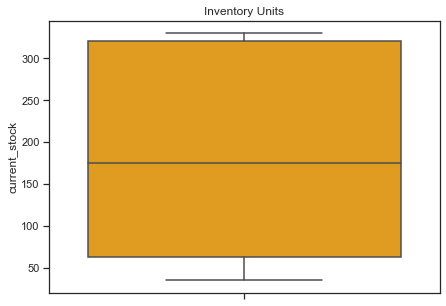

In [98]:
plt.figure(figsize=(7,5))
sns.boxplot(y=Inventory_data.current_stock,color='orange')
plt.title('Inventory Units')
plt.show()

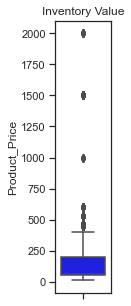

In [99]:
plt.figure(figsize=(1,5))
sns.boxplot(y=Sales_data.Product_Price,color='blue')
plt.title('Inventory Value')
plt.show()

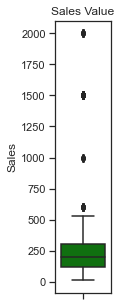

In [100]:
plt.figure(figsize=(1,5))
sns.boxplot(y=Sales_data.Sales,color='green')
plt.title('Sales Value')
plt.show()

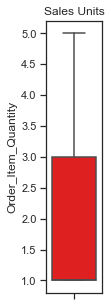

In [104]:
plt.figure(figsize=(1,5))
sns.boxplot(y=Sales_data.Order_Item_Quantity,color='red')
plt.title('Sales Units')
plt.show()

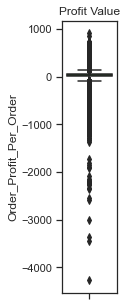

In [107]:
plt.figure(figsize=(1,5))
sns.boxplot(y=Sales_data.Order_Profit_Per_Order,color='green')
plt.title('Profit Value')
plt.show()

In [118]:
Delivery_status = Sales_data.groupby('Delivery_Status')['Order_Id'].count()

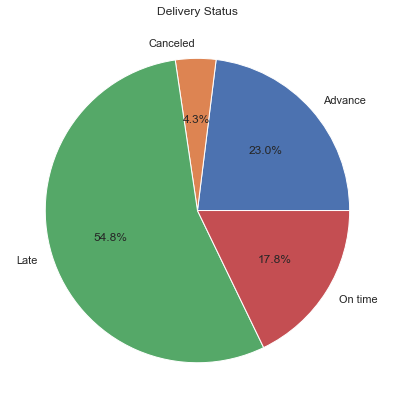

In [119]:
plt.figure(figsize=(10,7))
plt.pie(Delivery_status,labels=['Advance','Canceled','Late','On time'],autopct='%1.1f%%')
plt.title('Delivery Status')
plt.show()


In [120]:
Status_order = Sales_data.groupby('Order_Status')['Order_Id'].count()

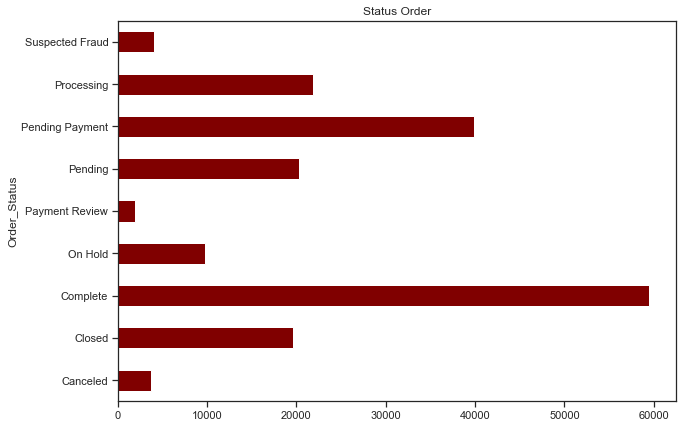

In [121]:
plt.figure(figsize=(10,7))
Status_order.plot(kind='barh',color ='maroon')
plt.title('Status Order')
plt.show()

In [122]:
Late_delivery = Sales_data.groupby('Late_Delivery_Risk')['Order_Id'].count()
Late_delivery

Late_Delivery_Risk
Late        103400
Not Late     77119
Name: Order_Id, dtype: int64

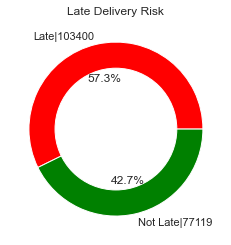

In [123]:
plt.pie(Late_delivery,colors=['red','green'],labels=['Late|103400','Not Late|77119'],autopct='%1.1f%%')
center_circle = plt.Circle((0,0),0.70,fc='white')
fig= plt.gcf()
fig.gca().add_artist(center_circle)
plt.title('Late Delivery Risk')
plt.show()

In [124]:
Order_Qty_count = Sales_data1.groupby('Month')['Order_Item_Quantity'].count().reset_index()
Order_Qty_avg = Sales_data1.groupby('Month')['Order_Item_Quantity'].mean().reset_index()

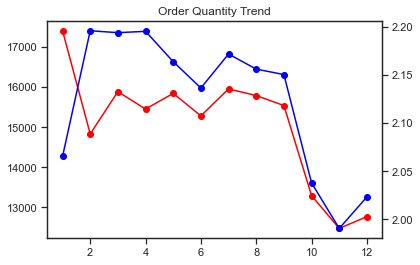

In [125]:
fig,ax = plt.subplots()
ax2 = ax.twinx()

ax.plot(Order_Qty_count['Month'],Order_Qty_count['Order_Item_Quantity'],color='red',marker='o')
ax2.plot(Order_Qty_avg['Month'],Order_Qty_avg['Order_Item_Quantity'],color='blue',marker='o')
plt.title('Order Quantity Trend')
plt.show()


In [126]:
Sales_units_count = Sales_data1.groupby('Month')['Sales'].sum().reset_index()
Sales_units_avg = Sales_data1.groupby('Month')['Sales'].mean().reset_index()

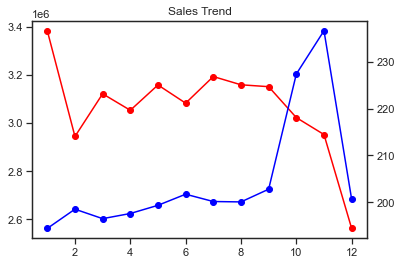

In [129]:
fig,ax = plt.subplots()
ax2 = ax.twinx()

ax.plot(Sales_units_count['Month'],Sales_units_count['Sales'],color='red',marker='o')
ax2.plot(Sales_units_avg['Month'],Sales_units_avg['Sales'],color='blue',marker='o')
plt.title('Sales Trend')
plt.show()

In [130]:
Sales_data1['Order_Profit_Per_Order']

0           9.610000
1           9.490000
2          30.709999
3          27.549999
4          47.500000
             ...    
180514   -302.350006
180515    117.010002
180516    -46.869999
180517    125.260002
180518    117.010002
Name: Order_Profit_Per_Order, Length: 180519, dtype: float64

In [131]:
Profit_count = Sales_data1.groupby('Month')['Order_Profit_Per_Order'].sum().reset_index()
Profit_avg = Sales_data1.groupby('Month')['Order_Profit_Per_Order'].mean().reset_index()

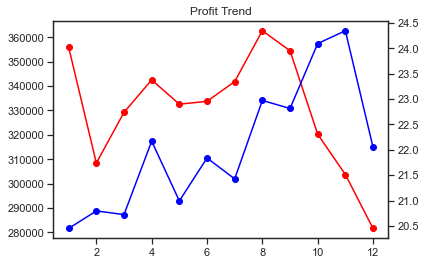

In [132]:
fig,ax = plt.subplots()
ax2 = ax.twinx()

ax.plot(Profit_count['Month'],Profit_count['Order_Profit_Per_Order'],color='red',marker='o')
ax2.plot(Profit_avg['Month'],Profit_avg['Order_Profit_Per_Order'],color='blue',marker='o')
plt.title('Profit Trend')
plt.show()

In [133]:
df_merge = pd.merge(left=Sales_data,right=Inventory_data,left_on='Product_Id',right_on='productid',how='inner')
Inventory_cluster = df_merge.groupby('Class')['current_stock'].sum()
Inventory_cluster

Class
High Value-Small Number           13399842
Moderate Value-Moderate Number     6059123
Small Value-Large Number          10919162
Name: current_stock, dtype: int64

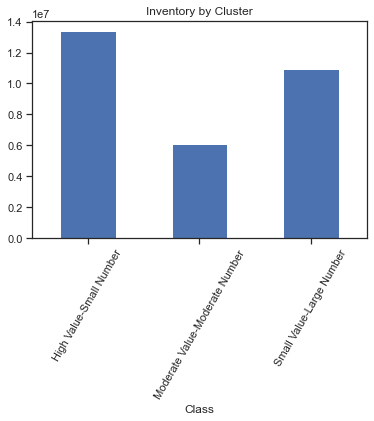

In [134]:
Inventory_cluster.plot(kind='bar')
plt.xticks(rotation=60)
plt.title('Inventory by Cluster')
plt.show()